# 3.5 Statistical plotting with Seaborn


[https://seaborn.pydata.org/](https://seaborn.pydata.org/)


Seaborn is built on top of Matplotlib, and improves it in several ways:

* Has more prebuilt functions for statistical plots
* The default parameters (looks) are more pleasing
* Has predefine styles can be easily switched between
* Understands data stored in pandas dataframes 
    
"If Matplotlib tries to make easy things easy and hard things possible, 

Seaborn tries to make a well-defined set of hard things easy too.”

See the [gallery](https://seaborn.pydata.org/examples/index.html) for ideas for your next plot!

In [1]:
#import numpy as np
import seaborn as sns

For relational plots between two or more numeric variables the following plotting functions exist:
* scatterplot (`relplot` with `kind='scatter'`, the default)
* lineplot (`relplot` with `kind='line'`)


In [2]:
# Load one of the datasets included with Seaborn  
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


For relational plotting of two or more variables use `relplot`.
This is equivalent to `scatterplot`.

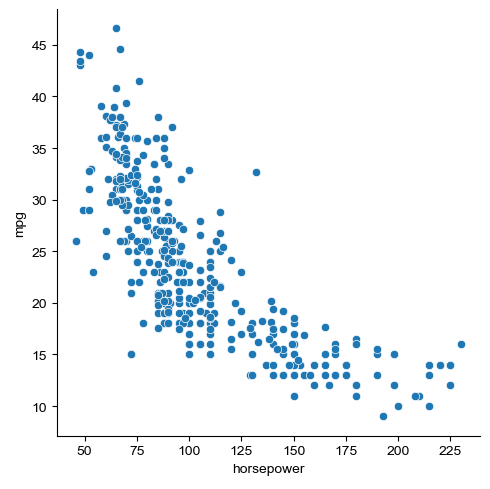

In [3]:
sns.relplot(x='horsepower', y='mpg', data=mpg)
sns.set_style('ticks')

This is also very similar to linear regression plot `lmplot` with `fit_reg=False`

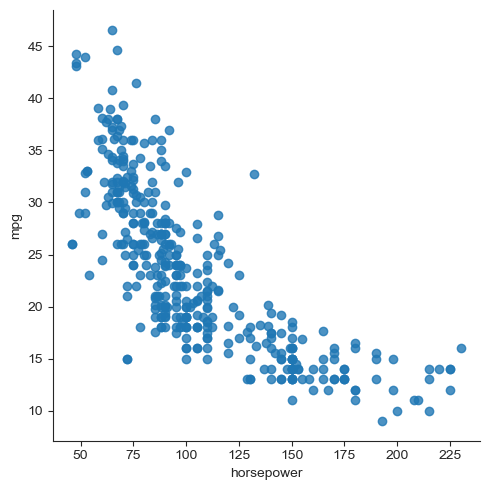

In [4]:
sns.lmplot(x='horsepower', y='mpg', data=mpg, fit_reg=False)

The `hue=` parameter can be used to plot a third variable.

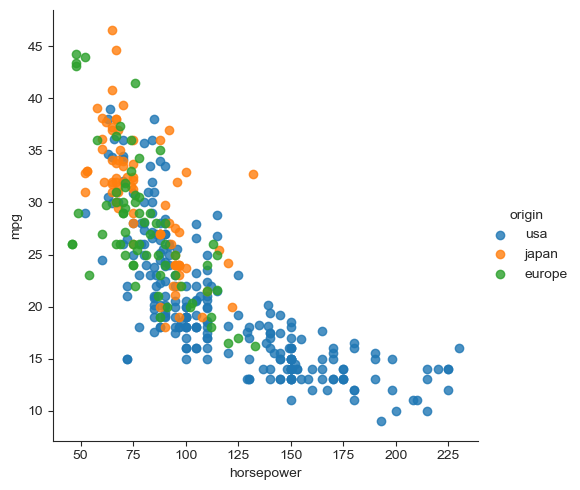

In [5]:
sns.lmplot(x='horsepower', y='mpg', data=mpg, hue='origin',fit_reg=False)

# Or use this....
#sns.relplot(x='horsepower', y='mpg', data=mpg, hue='origin')


`replot` can use marker `size` to show yet another variable

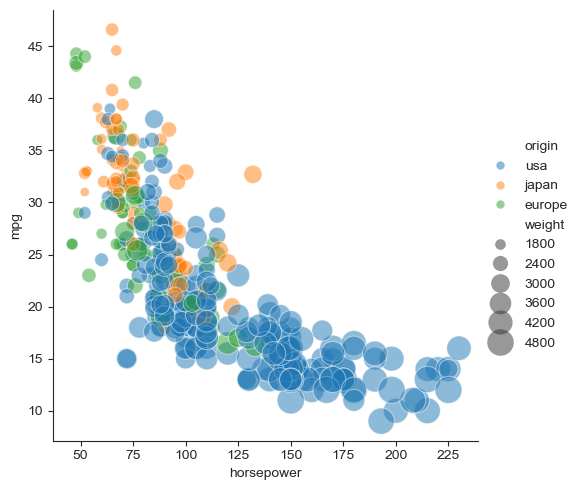

In [6]:
# Plotting 4 dimensions using hue and marker size 
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, data=mpg)

Joint plots are comonly used in exploratory data analysis.

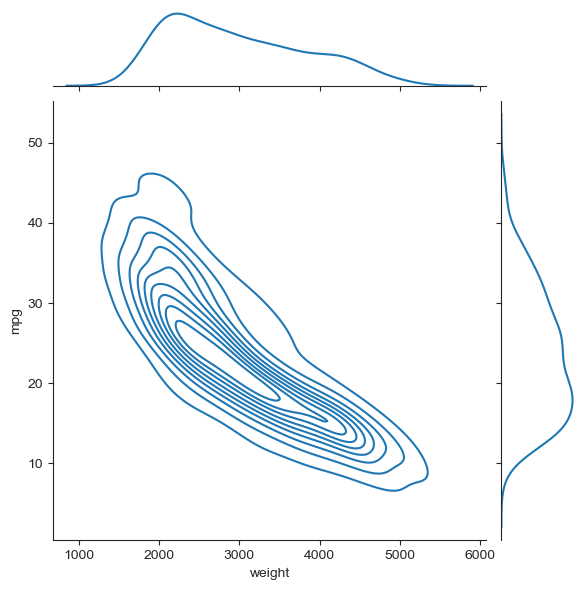

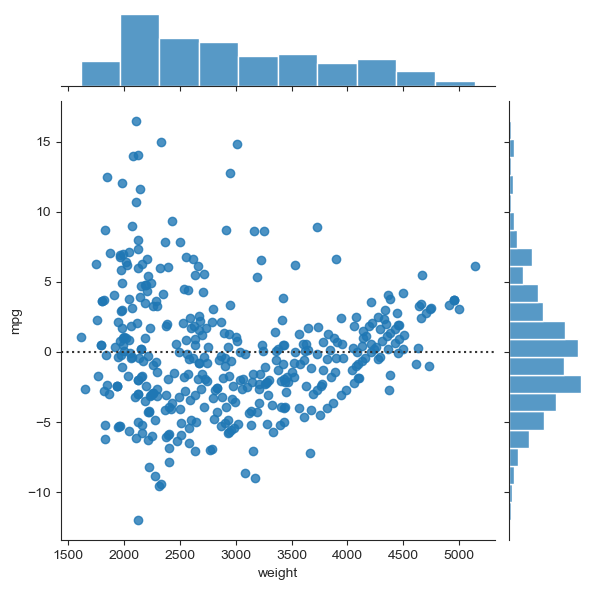

In [7]:
# Jointplot have the following kinds: scatter, kde, hex, reg and resid
sns.jointplot(x='weight', y='mpg', kind='kde', data=mpg)
sns.jointplot(x='weight', y='mpg', kind='resid', data=mpg)

## Plotting a regression

Let's create a new variable in the dataframe with will improve these residuals.

In [8]:
# Unlike mpg, litre/100 km is proportional to energy consumption

mpg['lp100km'] = (3.785*100)/(mpg['mpg']*1.602)

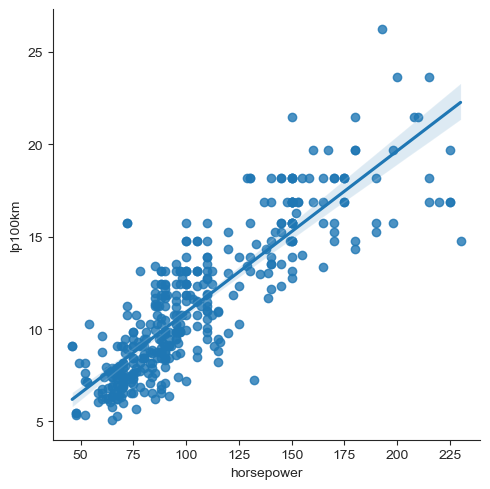

In [9]:
g = sns.lmplot(x='horsepower', y='lp100km', data=mpg,x_ci='sd')

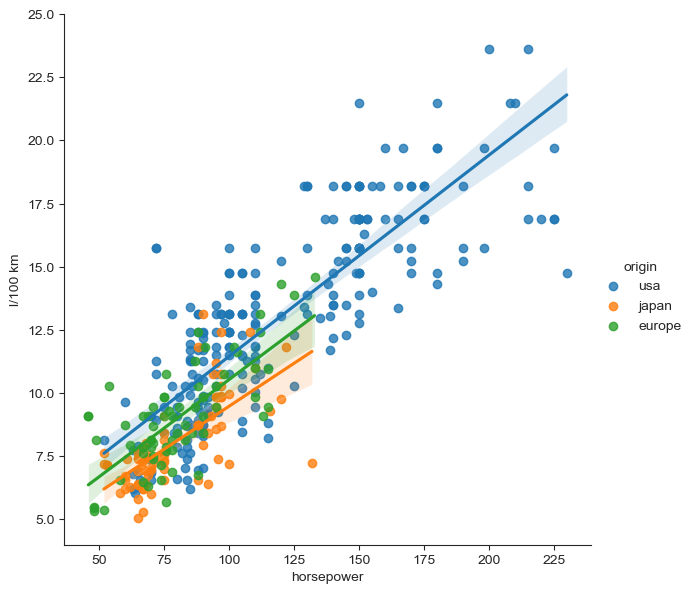

In [10]:
# If hue is added, the same variable is used to group data point for regressiona analysis
# Also, local regression method `lowess` was chosen
g = sns.lmplot(x='horsepower', y='lp100km', data=mpg,hue='origin',truncate=True, x_ci='sd',height=6)
g.set(ylim=(4, 25))
g.set(ylabel="l/100 km")

## FacetGrid 

Tis useful facet function creates a grid of matplotlib or seaborn plot ir rows and/or columns

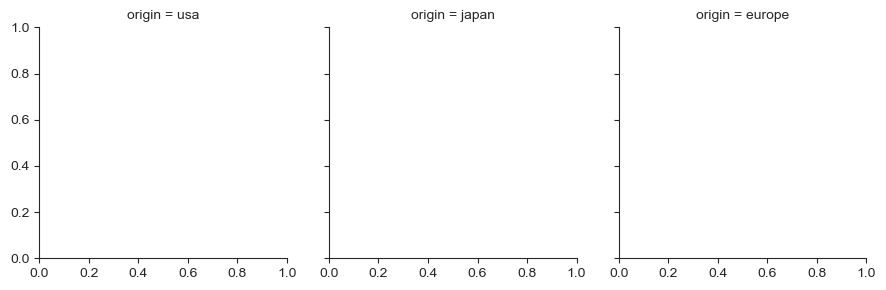

In [11]:
# Start by creating the empty grid
g = sns.FacetGrid(mpg, col="origin")

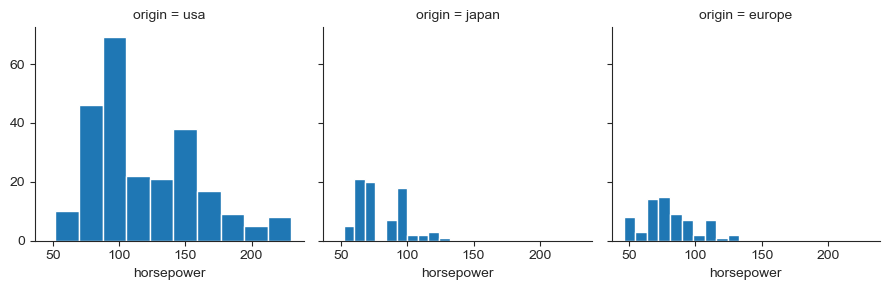

In [12]:
# Here we will use the matplotlib standard histogram

import matplotlib.pyplot as plt

g = sns.FacetGrid(mpg, col="origin")
g = g.map(plt.hist, "horsepower")

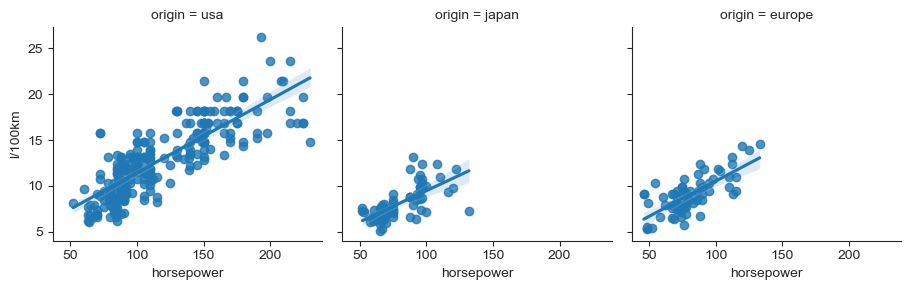

In [13]:
# Or a Seaborn plot type
g = sns.FacetGrid(mpg, col='origin',col_wrap=5)
g = g.map(sns.regplot, "horsepower", "lp100km")
g.set(ylabel="l/100km")

## Predefined styles

There are 5 prefdefined styles: `darkgrid`, `whitegrid`, `dark`, `white` and` ticks`.
These can be set with function `set_style`. 

See [examples](https://python-graph-gallery.com/104-seaborn-themes/) or try out below.

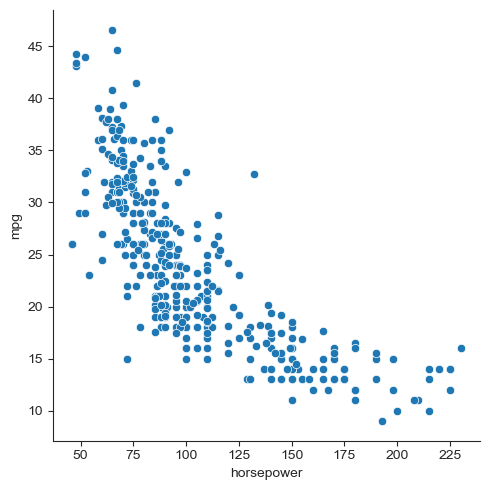

In [14]:
sns.relplot(x='horsepower', y='mpg', data=mpg)
sns.set_style('whitegrid')
